# What are the most demanded skills for the top 3 most popular data roles?

1. Clean up Skill Column
2. Calculate Skill Count based on 'job_title_short'
3. Calculate Skill Percentage
4. Plot Final Findings

In [1]:
#importing libraries
import ast
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply([lambda x: ast.literal_eval(x) if pd.notna(x) else x])


In [2]:
df_US = df[df['job_country'] == 'United States']

In [3]:
df_skills = df_US.explode('job_skills')

In [7]:
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [4]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [5]:
job_titles = df_skills_count['job_title_short'].tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Scientist', 'Data Scientist']

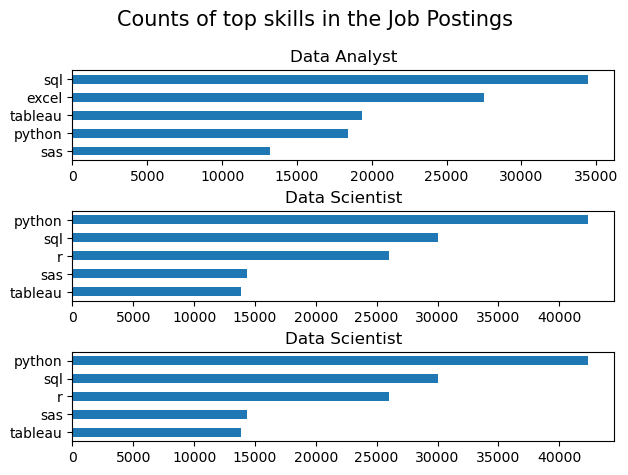

In [33]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    
fig.suptitle('Counts of top skills in the Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()

In [9]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [8]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [11]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skills_perc'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

In [21]:
df_skills_perc.sort_values(by='skills_perc', inplace=True, ascending=False)
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skills_perc
19,python,Senior Data Scientist,9816,12946,75.822648
29,python,Senior Data Engineer,6692,9289,72.042200
0,python,Data Scientist,42379,58830,72.036376
30,sql,Senior Data Engineer,6651,9289,71.600818
269,python,Machine Learning Engineer,644,921,69.923996
...,...,...,...,...,...
1834,asp.net core,Data Analyst,1,67816,0.001475
1804,theano,Data Analyst,1,67816,0.001475
1806,gtx,Data Analyst,1,67816,0.001475
1783,capacitor,Data Analyst,1,67816,0.001475


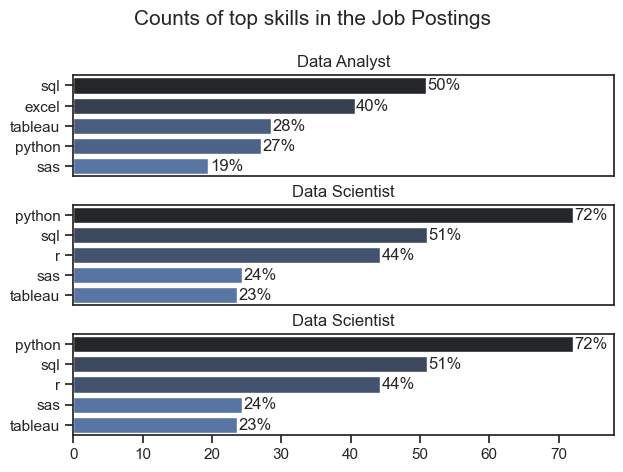

In [46]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skills_perc', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    # ax[i].invert_yaxis()
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 78)
    ax[i].legend().set_visible(False)

    for n , v in enumerate(df_plot['skills_perc']):
        ax[i].text(v+0.22, n, f'{int(v)}%', va='center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
fig.suptitle('Counts of top skills in the Job Postings', fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()